# Figures for paper

In [5]:
import deepnets.data.load as loader
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.table as table
import numpy as np
import seaborn as sns
import deepnets.data.funcs as funcs
import matplotlib as mpl
import os
import json
colors = sns.color_palette("Dark2", 6)
import matplotlib.lines as mlines
#Following values taken from Viteritti et al. PRB 111, 134411 (2025)
E_GS = -0.4517531
E_vit = {6: -0.451707,
         8: -0.44983,
         10: -0.44929}
energies_vit = [e for e in E_vit.values()]

def inches(cm): #convert from cm to inches
    return 0.394*cm

plt.style.use('paper.mplstyle') #see .matplotlib/stylelib/paper.mplstyle

/Users/rajah.nutakki/repos/convnext_nnqs/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def get_results(directory_name: str):
    log = loader.get_matching(directory_name,"log")[0]
    results = json.load(open(log))
    return results

## Figure 6

In [6]:
#Load data
L = 6
file = "files/L6/nopatching/optimization/4/"
result_nopatching = get_results(file)
file = "files/L6/3x3/2/0/"
result_patching = get_results(file)
E_nopatching = -65.03517805364847/(4*L**2) # from expectation_value.json
err_nopatching = 0.0009167068449636769/(4*L**2)
t_nopatching = 1.68 #see nopatching/timing
Np_nopatching = 101664
E_patching = -65.04727304975367/(4*L**2)
err_patching = 0.0008498420817597366/(4*L**2)
t_patching = 1.27 #see patching/timing
Np_nopatching = 99720

Patching: E = -0.4517172 +- 0.0000059, epsilon = 7.952583696120998e-05, t = 1.27
No Patching: E = -0.4516332 +- 0.0000064, epsilon = 0.0002654526817540111, t = 1.68


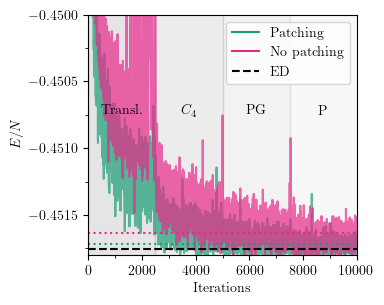

In [7]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(inches(10),inches(8)),tight_layout=True)
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4 = 2.5e3, 2.5e3, 2.5e3, 2.5e3
symms = ['Transl.', r'$C_4$', 'PG', r'P']

ax.plot(np.arange(len(result_patching["Energy"]["iters"])),funcs.to_array(result_patching["Energy"]["Mean"]["real"])/(4*L**2),color=colors[0],alpha = alpha)
ax.plot(np.arange(len(result_nopatching["Energy"]["iters"])),funcs.to_array(result_nopatching["Energy"]["Mean"]["real"])/(4*L**2),color=colors[3],alpha = alpha)
ax.plot([0,1e4],[E_GS,E_GS],linestyle='--',color='black')

ax.set_xlabel('Iterations')
ax.set_ylabel(r'$E/N$')
ax.set_xticks(xticks,minor=False)
ax.set_xticks(xticks_m,minor=True)
ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)

ax.set_ylim([-0.4518,-0.45])
ax.set_xlim([0,1e4])
ax.set_yticks(np.arange(-0.4515,-0.4499,0.0005))
ax.set_yticks(np.arange(-0.45175,-0.4499,0.0005),minor=True)
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4)):
    total_s += s
    ax.annotate(symms[i],xy=((total_s+old_s)/2,-0.45075),ha='center')
    old_s = total_s
ax.plot([0,total_s],2*[E_patching],':',color=colors[0])
ax.plot([0,total_s],2*[E_nopatching], ':',color=colors[3])
labels = ["Patching","No patching"]
lines = [mlines.Line2D([],[],color=colors[j], label = labels[i]) for i,j in enumerate([0,3])]+[mlines.Line2D([],[],color='black',linestyle='--',label = 'ED')]
ax.legend(handles=lines)

print(f"Patching: E = {E_patching:.7f} +- {err_patching:.7f}, epsilon = {(E_patching-E_GS)/abs(E_GS)}, t = {t_patching}")
print(f"No Patching: E = {E_nopatching:.7f} +- {err_nopatching:.7f}, epsilon = {(E_nopatching-E_GS)/abs(E_GS)}, t = {t_nopatching}")
plt.show()

## Figure 7

### a)

In [38]:
#For L = 6
L6 = { #(energy_per_site, error), (vscore,error)
    "depth2,kernel2x2":{"energy": (-0.4516428,0.0000048), "vscore":(2.4e-3,0), "num_parameters": 54792, "num_completed":1, "std": 0},
    "depth4,kernel2x2":{"energy": (-0.4517239,0.0000051), "vscore":(9.1e-4,0), "num_parameters": 98280, "num_completed":3, "std": 0.000004025},
    "depth8,kernel2x2":{"energy": (-0.4517275,0.0000031), "vscore":(7.3e-4,0), "num_parameters": 185256, "num_completed":2, "std": 0.000002375},
    "depth12,kernel2x2":{"energy":(-0.4517324,0.0000030), "vscore":(6.2e-4,0), "num_parameters": 272232, "num_completed":2, "std": 0.000000024},
    "depth2,kernel3x3":{"energy": (-0.4516568,0.0000070), "vscore":(2.7e-3,0), "num_parameters": 55512, "num_completed":2, "std": 0.000002702},
    "depth4,kernel3x3":{"energy": (-0.4517172,0.0000059), "vscore":(9.6e-4,0), "num_parameters": 99720, "num_completed":3, "std": 0.000003509}, #02_10_24/03_10_24
    "depth8,kernel3x3":{"energy": (-0.4517252,0.0000035), "vscore":(0,0), "num_parameters": 188136, "num_completed":3, "std": 0.000003993},
    "depth12,kernel3x3":{"energy":(-0.4517265,0.0000046), "vscore":(0,0), "num_parameters": 276552, "num_completed":3, "std": 0.000003509},
}
#For L = 8
L8 = { #(energy_per_site, error), (vscore,error)
    "depth2,kernel2x2":{"energy": (-0.4492254,0.0000109), "vscore":(0.0116005,0), "num_parameters": 54792, "num_completed":1, "std": 0},
    "depth4,kernel2x2":{"energy": (-0.4498057,0.0000058), "vscore":(0.0030463 ,0), "num_parameters": 98280,"num_completed":3, "std": 0.0000023},
    "depth8,kernel2x2":{"energy": (-0.4498688,0.0000035), "vscore":(0.0017295 ,0), "num_parameters": 185256,"num_completed":3, "std": 0.0000084},
    "depth12,kernel2x2":{"energy": (-0.4498757,0.0000035), "vscore":(0.0013080,0), "num_parameters": 272232,"num_completed":2, "std": 0.0000018},
    "depth2,kernel3x3":{"energy": (-0.4495933,0.0000075), "vscore":(7e-3,0), "num_parameters": 55512,"num_completed":3, "std": 0.0000583},
    "depth4,kernel3x3":{"energy": (-0.4498443,0.0000056), "vscore":(2.2e-3,0), "num_parameters": 99720,"num_completed":3, "std": 0.0000077},
    "depth8,kernel3x3":{"energy": (-0.4498720,0.0000040), "vscore":(1.6e-3,0), "num_parameters": 188136,"num_completed":3, "std": 0.0000038},
    "depth12,kernel3x3":{"energy": (-0.4498662,0.0000039), "vscore":(1.5e-3,0), "num_parameters": 276552,"num_completed":1, "std": 0},
    "depth2,kernel4x4":{"energy": (-0.4492797,0.0000131), "vscore":(0.01432952,0), "num_parameters": 56520,"num_completed":2, "std": 0.0009688}, 
    "depth4,kernel4x4":{"energy": (-0.4498038,0.0000049), "vscore":(0.00326584,0), "num_parameters": 101736,"num_completed":2, "std": 0.0000616},
    "depth8,kernel4x4":{"energy": (-0.4498318,0.0000040), "vscore":(0.00231658,0), "num_parameters": 192168,"num_completed":2, "std": 0.0000068},
    "depth12,kernel4x4":{"energy": (-0.4498219,0.0000062), "vscore":(0.00269026,0), "num_parameters": 282600,"num_completed":2, "std": 0.0000019},
}
L10 = { #(energy_per_site, error), (vscore,error)
    "depth2,kernel2x2":{"energy": (-0.4480844,0.0000104), "vscore":(0.0179321,0), "num_parameters": 54792,"num_completed":1, "std": 0},
    "depth4,kernel2x2":{"energy": (-0.4491319,0.0000069), "vscore":(0.0061829,0), "num_parameters": 98280,"num_completed":2, "std": 0.0000404},
    "depth8,kernel2x2":{"energy": (-0.4492929,0.0000036), "vscore":(0.0029957,0), "num_parameters": 185256,"num_completed":1, "std": 0},
    "depth12,kernel2x2":{"energy": (np.nan, np.nan), "vscore":(np.nan,np.nan), "num_parameters": 272232,"num_completed":0, "std": 0},
    "depth2,kernel3x3":{"energy": (-0.4487962,0.0000088), "vscore":(0.0113328,0), "num_parameters": 55512,"num_completed":2, "std": 0.0000455},
    "depth4,kernel3x3":{"energy": (-0.4492539,0.0000051), "vscore":(0.0037906,0), "num_parameters": 99720,"num_completed":3, "std": 0.0000071},
    "depth8,kernel3x3":{"energy": (-0.4492866,0.0000038), "vscore":(0.0035270,0), "num_parameters": 188136, "num_completed": 2, "std": 0.0000037},
    "depth12,kernel3x3":{"energy": (-0.4492980, 0.0000037), "vscore":(0.0031164,0), "num_parameters": 276552,"num_completed": 1, "std": 0},
    "depth2,kernel5x5":{"energy": (-0.4485597,0.0000114), "vscore":(0.0182304,0), "num_parameters": 57816,"num_completed": 1, "std": 0}, 
    "depth4,kernel5x5":{"energy": (-0.4487970,0.0000090), "vscore":(0.0123813,0), "num_parameters": 104328,"num_completed": 2, "std": 0.0000417},
    "depth8,kernel5x5":{"energy": (-0.4489501,0.0000090), "vscore":(0.0090402,0), "num_parameters": 197352,"num_completed": 1, "std": 0},
    "depth12,kernel5x5":{"energy": (-0.4486715,0.0000091), "vscore":(0.0141352,0), "num_parameters": 290376,"num_completed": 2, "std": 0.0013139},
}

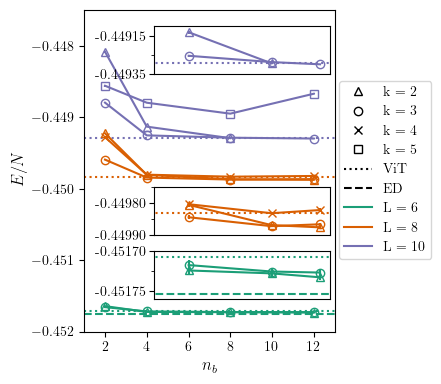

In [39]:
#Plot vs n_b

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(inches(9),inches(10)),tight_layout=True)
markers = ['^','o','x','s']
xlabel = r'$n_b$'
ylabel = r'$E/N$'
kernel_widths = [[2,3],[2,3,4],[2,3,5]]
depths = (2,4,8,12)
Ls = (6,8,10)
xmin,xmax = 1, 13
ymin,ymax = -0.452,-0.4475

for i,L_data in enumerate((L6,L8,L10)):
    for j in range(len(kernel_widths[i])):
        k_width = kernel_widths[i][j]
        x = [d for d in depths]
        y1 = [L_data[f"depth{d},kernel{k_width}x{k_width}"]["energy"][0] for d in depths]
        y1_err = [L_data[f"depth{d},kernel{k_width}x{k_width}"]["energy"][1] for d in depths]
        #y1_err = [L_data[f"depth{d},kernel{k_width}x{k_width}"]["std"] for d in depths]
        ax.errorbar(x,y1,yerr = y1_err,marker=markers[k_width-2],color=colors[i],markerfacecolor='None')

#nopatching
# ax.errorbar(nopatching["num_parameters"],nopatching["energy"][0],yerr = nopatching["std"],marker='*',markerfacecolor='None',color=colors[0])
# #expansion factor
# ax.errorbar(expansion_factor["1"]["num_parameters"],expansion_factor["1"]["energy"][0],yerr = expansion_factor["1"]["std"],marker='o',color=colors[2],alpha=0.4)
# ax.errorbar(expansion_factor["4"]["num_parameters"],expansion_factor["4"]["energy"][0],yerr = expansion_factor["4"]["std"],marker='o',color=colors[2],alpha=0.6)
#Plot exact and ViT
ax.plot([xmin,xmax],2*[E_GS],color=colors[0],marker='None',linestyle='--')
for i in range(len(Ls)):
    ax.plot([xmin,xmax],2*[E_vit[Ls[i]]],color=colors[i],marker='None',linestyle=':')

# xticks_m = np.concatenate((np.arange(xmin,1e5,1e4),np.arange(1e5,4.5e5,1e5)))
# xticks = [1e5]
xticks = np.arange(2,13,2)
#xticks_m = np.arange(5e4,3.1e5,1e5)
ax.set_xlabel(xlabel,fontsize=12)
ax.set_ylabel(ylabel,fontsize=12)
#ax.set_xscale('log')
ax.set_xlim([xmin,xmax])
ax.set_xticks(xticks)
#ax.set_xticks(xticks_m,minor=True)
#ax.set_xticklabels([])
#ax.set_xticks(xticks_m,minor=True)
ax.set_ylim([ymin,ymax])

#Inset axes
inxmin, inxmax = 3, 13
inax0=ax.inset_axes([0.28,0.8,0.7,0.15])
i=2
L_data = L10
for j in range(len(kernel_widths[i])-1):
    k_width = kernel_widths[i][j]
    x = [d for d in depths]
    y1 = [L_data[f"depth{d},kernel{k_width}x{k_width}"]["energy"][0] for d in depths]
    y1_err = [L_data[f"depth{d},kernel{k_width}x{k_width}"]["energy"][1] for d in depths]
    #y1_err = [L_data[f"depth{d},kernel{k_width}x{k_width}"]["std"] for d in depths]
    inax0.errorbar(x[1:],y1[1:],yerr = y1_err[1:],marker=markers[k_width-2],color=colors[i],markerfacecolor='None')
#inax0.errorbar(expansion_factor["4"]["num_parameters"],expansion_factor["4"]["energy"][0],yerr = expansion_factor["4"]["std"],marker='o',color=colors[2],alpha=0.6)
inax0.plot([xmin,xmax],2*[E_vit[Ls[i]]],color=colors[i],marker='None',linestyle=':')
    
inax1=ax.inset_axes([0.28,0.3,0.7,0.15])
i=1
L_data = L8
for j in range(len(kernel_widths[i])):
    k_width = kernel_widths[i][j]
    x = [d for d in depths]
    y1 = [L_data[f"depth{d},kernel{k_width}x{k_width}"]["energy"][0] for d in depths]
    y1_err = [L_data[f"depth{d},kernel{k_width}x{k_width}"]["energy"][1] for d in depths]
    #y1_err = [L_data[f"depth{d},kernel{k_width}x{k_width}"]["std"] for d in depths]
    inax1.errorbar(x[1:],y1[1:],yerr = y1_err[1:],marker=markers[k_width-2],color=colors[i],markerfacecolor='None')
inax1.plot([xmin,xmax],2*[E_vit[Ls[i]]],color=colors[i],marker='None',linestyle=':')

inax2=ax.inset_axes([0.28,0.1,0.7,0.15])
i=0
L_data = L6
for j in range(len(kernel_widths[i])):
    k_width = kernel_widths[i][j]
    x = [d for d in depths]
    y1 = [L_data[f"depth{d},kernel{k_width}x{k_width}"]["energy"][0] for d in depths]
    y1_err = [L_data[f"depth{d},kernel{k_width}x{k_width}"]["energy"][1] for d in depths]
    #y1_err = [L_data[f"depth{d},kernel{k_width}x{k_width}"]["std"] for d in depths]
    inax2.errorbar(x[1:],y1[1:],yerr = y1_err[1:],marker=markers[k_width-2],color=colors[i],markerfacecolor='None')
inax2.plot([xmin,xmax],2*[E_vit[Ls[i]]],color=colors[i],marker='None',linestyle=':')
inax2.plot([xmin,xmax],2*[E_GS],color=colors[0],marker='None',linestyle='--')
#nopatching
#inax2.errorbar(nopatching["num_parameters"],nopatching["energy"][0],yerr = nopatching["std"],marker='*',markerfacecolor='None',color=colors[0])

for inax in (inax0,inax1,inax2):
    inax.set_xscale('log')
    inax.set_xlim([inxmin,inxmax])
    inax.get_xaxis().set_visible(False)

ymin0,ymax0 = -0.44935,-0.4491
ylabels = [-0.44935,-0.44915]
inax0.set_ylim([ymin0,ymax0])
inax0.set_yticks(ylabels)
inax0.set_yticks([-0.44925],minor=True)
inax0.set_yticklabels([f"{y:.5f}" for y in ylabels])

ymin1,ymax1 = -0.4499,-0.44975
ylabels = [-0.4499,-0.4498]
inax1.set_ylim([ymin1,ymax1])
inax1.set_yticks(ylabels)
inax1.set_yticks([-0.44985,-0.44975],minor=True)
inax1.set_yticklabels([f"{y:.5f}" for y in ylabels])

ymin2,ymax2 = -0.45176,-0.4517
ylabels = [-0.45175,-0.4517]
inax2.set_ylim([ymin2,ymax2])
inax2.set_yticks(ylabels)
inax2.set_yticklabels([f"{y:.5f}" for y in ylabels])
inax2.set_yticks([-0.451725],minor=True)

# #Table 
# table_list = [['Kernel width','time/it'],
#               [r'$2$', r'$1.27 \: \mathrm{s}$'],
#               [r'$3$', r'$1.68 \: \mathrm{s}$'],
#               [r'$5$', r'$1.68 \: \mathrm{s}$']]
# table.table(ax = ax, cellText = table_list,loc='right',cellLoc='center')

#Legend
k_widths = [2,3,4,5]
lines = [
    mlines.Line2D([],[],marker=markers[i],linestyle='None',color='black', label = f"k = {k_widths[i]}",markerfacecolor='None') for i in range(4)
]+[
    #mlines.Line2D([],[],marker="*",linestyle='None',color='black', label = f"no patching",markerfacecolor='None')
]+[
    mlines.Line2D([],[],marker="None",linestyle=':',color='black', label = f"ViT")
]+[
     mlines.Line2D([],[],marker="None",linestyle='--',color='black', label = f"ED")
]+[
    mlines.Line2D([],[],marker='None',linestyle='-',color=colors[i], label = f"L = {Ls[i]}") for i in range(3)
]

fig.legend(handles=lines,bbox_to_anchor=(1.25,0.8))
plt.show()

### b)

In [16]:
# L = 10
results = { #(energy_per_site, error), (vscore,error) 
    "depth2,expansionfactor1":{"energy": (-0.4486040,0.0000098), "vscore":(0.0155650,0), "num_parameters": 34344,"num_completed":2, "std": 0.0002414, "time/it": 1.28},
    "depth2,expansionfactor2":{"energy": (-0.4487962,0.0000088), "vscore":(0.0113328,0), "num_parameters": 55512,"num_completed":2, "std": 0.0000455, "time/it": 1.34},
    "depth2,expansionfactor4":{"energy": (-0.4489254,0.0000094), "vscore":(0.0108448,0), "num_parameters": 97848,"num_completed":1, "std": 0, "time/it": 1.47},
    "depth4,expansionfactor1":{"energy": (-0.4490397,0.0000071), "vscore":(0.0092682,0), "num_parameters": 57384,"num_completed":1, "std": 0, "time/it": 1.45},
    "depth4,expansionfactor2":{"energy": (-0.4492539,0.0000051), "vscore":(0.0037906,0), "num_parameters": 99720,"num_completed":3, "std": 0.0000071, "time/it": 1.58},
    "depth4,expansionfactor4":{"energy": (-0.4493158,0.0000042), "vscore":(0.0029453,0), "num_parameters": 184392,"num_completed":1, "std": 0, "time/it": 1.86},
    "depth6,expansionfactor1":{"energy": (-0.4492695,0.0000046), "vscore":(0.0035485,0), "num_parameters": 80424,"num_completed":2, "std": 0.0013518, "time/it": 1.64},
    "depth6,expansionfactor2":{"energy": (-0.4492905,0.0000046), "vscore":(0.0031477,0), "num_parameters": 143928,"num_completed":1, "std": 0, "time/it": 1.83},
    "depth6,expansionfactor3":{"energy": (-0.4493375,0.0000037), "vscore":(0.0026337,0), "num_parameters": 207432,"num_completed":1, "std": 0, "time/it": 2.03},
    "depth8,expansionfactor1":{"energy": (-0.4491856,0.0000057), "vscore":(0.0060208,0), "num_parameters": 103464,"num_completed":2, "std": 0.0000920, "time/it": 1.8},
    "depth8,expansionfactor2":{"energy": (-0.4492866,0.0000038), "vscore":(0.0035270,0), "num_parameters": 188136,"num_completed":2, "std": 0.0000037, "time/it": 2.06},
    "depth8,expansionfactor3":{"energy": (-0.4493058,0.0000046), "vscore":(0.0030180,0), "num_parameters": 272808,"num_completed":1, "std": 0, "time/it": 2.33}
}

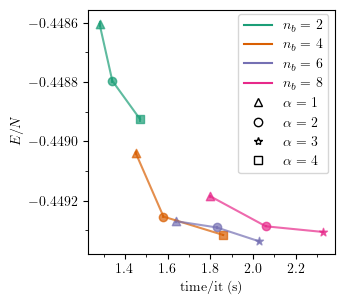

In [17]:
fig, ax = plt.subplots(figsize=(inches(9),inches(8)),tight_layout=True)
depths = (2,4,6,8)

for i,depth in enumerate(depths):
    if i < 2:
        expansion_factors = (1,2,4)
        markers = ['^','o','s']
    elif i == 2 or i == 3:
        expansion_factors = (1,2,3)
        markers = ['^','o','*']

    y = [results[f"depth{depth},expansionfactor{expansion_factor}"]["energy"][0] for expansion_factor in expansion_factors]
    y_err = [results[f"depth{depth},expansionfactor{expansion_factor}"]["energy"][1] for expansion_factor in expansion_factors]
    x = [results[f"depth{depth},expansionfactor{expansion_factor}"]["time/it"] for expansion_factor in expansion_factors]
    ax.errorbar(x,y,yerr=y_err,color=colors[i],alpha=0.7)
    for j in range(len(y)):
        ax.scatter(x[j],y[j],color=colors[i],alpha=0.7,marker=markers[j])

expansion_factors=(1,2,3,4)
markers=['^','o','*','s']
lines = [
    mlines.Line2D([],[],linestyle='-',color=colors[i], label = r'$n_b =$'+f" {depths[i]}") for i in range(len(depths))
]+[
    mlines.Line2D([],[],marker=markers[i],linestyle='None',color='black',markerfacecolor='None',label = r'$\alpha =$'+f" {expansion_factors[i]}") for i in range(4)
]

ax.set_xlabel('time/it (s)')
ax.set_ylabel(r'$E/N$')

ax.set_yticks(np.arange(-0.4492,-0.4485,0.0002))
ax.set_yticks(np.arange(-0.4493,-0.4485,0.0002),minor=True)
ax.set_xticks(np.arange(1.4,2.4,0.2))
ax.set_xticks(np.arange(1.3,2.4,0.2),minor=True)

fig.legend(handles=lines,bbox_to_anchor=(0.96,0.96))
plt.show()

### c)

In [9]:
results = {
    "outputdepth1,outputexpansionfactor0.5": {"energy": (-0.4492503,4.4e-6), "num_head_parameters": 5544},
    "outputdepth1,outputexpansionfactor1": {"energy": (-0.4492539,5.1e-6), "num_head_parameters": 10944},
    "outputdepth1,outputexpansionfactor2": {"energy": (-0.4492317,5.9e-6), "num_head_parameters": 21744},
    "outputdepth1,outputexpansionfactor3": {"energy": (None,None), "num_head_parameters": None},
    "outputdepth2,outputexpansionfactor0.5": {"energy": (-0.4489940,7.8e-6), "num_head_parameters": 8352},
    "outputdepth2,outputexpansionfactor1": {"energy": (-0.4491982,6.4e-6), "num_head_parameters": 21744},
    "outputdepth2,outputexpansionfactor2": {"energy": (-0.4492636,4.6e-6), "num_head_parameters": 64080},
    "outputdepth2,outputexpansionfactor3": {"energy": (-0.4492109,5.7e-6), "num_head_parameters": 127152},
    "qhead": {"energy": (-0.4492133,5e-6), "num_head_parameters": 10800},
}

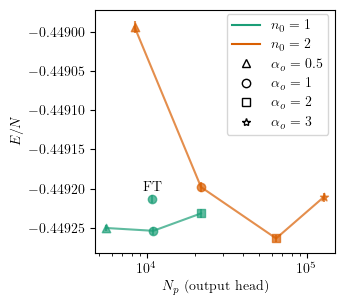

In [15]:
fig, ax = plt.subplots(figsize=(inches(9),inches(8)),tight_layout=True)
markers = ['^','o','s','*']
output_depths = (1,2)
expansion_factors = (0.5,1,2,3)
for i,depth in enumerate(output_depths):
    y = [results[f"outputdepth{depth},outputexpansionfactor{expansion_factor}"]["energy"][0] for expansion_factor in expansion_factors if not results[f"outputdepth{depth},outputexpansionfactor{expansion_factor}"]["energy"][0] is None]
    y_err = [results[f"outputdepth{depth},outputexpansionfactor{expansion_factor}"]["energy"][1] for expansion_factor in expansion_factors if not results[f"outputdepth{depth},outputexpansionfactor{expansion_factor}"]["energy"][1] is None]
    x = [results[f"outputdepth{depth},outputexpansionfactor{expansion_factor}"]["num_head_parameters"] for expansion_factor in expansion_factors if not results[f"outputdepth{depth},outputexpansionfactor{expansion_factor}"]["num_head_parameters"] is None]
    #print(x,y,y_err)
    ax.errorbar(x,y,yerr=y_err,color=colors[i],alpha=0.7)
    for j in range(len(y)):
        ax.scatter(x[j],y[j],color=colors[i],alpha=0.7,marker=markers[j])

ax.errorbar(results["qhead"]["num_head_parameters"],results["qhead"]["energy"][0],yerr=results["qhead"]["energy"][1],marker='o',color=colors[0],alpha=0.7)

lines = [
    mlines.Line2D([],[],linestyle='-',color=colors[i], label = r'$n_0 = $'+f" {output_depths[i]}") for i in range(len(output_depths))
]+[
    mlines.Line2D([],[],marker=markers[i],linestyle='None',color='black',markerfacecolor='None',label = r'$\alpha_o =$'+f" {expansion_factors[i]}") for i in range(4)
]

ax.set_xlabel(r'$N_p$'+" (output head)")
ax.set_ylabel(r'$E/N$')

# ax.set_yticks(np.arange(-0.4493,-0.4492,0.00002))
# ax.set_yticks(np.arange(-0.44929,-0.4492,0.00002),minor=True)
# ax.set_xticks(np.arange(2e4,6.5e4,2e4))
# ax.set_xticks(np.arange(1e4,6.5e4,2e4),minor=True)
ax.set_xscale('log')
ax.annotate('FT', xy=(results["qhead"]["num_head_parameters"],results["qhead"]["energy"][0]),xytext=(results["qhead"]["num_head_parameters"],results["qhead"]["energy"][0]+1e-5),ha='center')

fig.legend(handles=lines,bbox_to_anchor=(0.96,0.96))
plt.show()


## Figure 8

In [53]:
summary = ( #(depth, kernel size, expansion factor)[output depth, output expansion factor]
    {"network": r'$(4,3,2)[1,1](\mathrm{p})$', "energy": (-0.451717,0.0000059),"num_parameters":99720,"flops":1674664, "time/it": 1.27},
    {"network": r'$(4,3,2)[1,1](\mathrm{np})$', "energy": (-0.4516332,0.0000064),"num_parameters":101664,"flops":6743512, "time/it": 1.68},
    {"network": r'$\mathbf{(4,3,2)[1,1]}$', "energy": (-0.4492539,0.0000051), "num_parameters": 99720,"flops":4607912, "time/it": 1.58},
    {"network": r'$(2,2,2)[1,1]$', "energy": (-0.4480844,0.0000104), "num_parameters": 54792,"flops":2288734, "time/it": 1.33}, #receptive field
    {"network": r'$(2,3,2)[1,1]$', "energy": (-0.4487962,0.0000088), "num_parameters": 55512,"flops":2324734, "time/it": 1.34},
    {"network": r'$(8,3,2)[1,1]$', "energy": (-0.4492866,0.0000038), "num_parameters": 188136,"flops":9174268, "time/it": 2.06},
    {"network": r'$(4,2,2)[1,1]$', "energy": (-0.4491319,0.0000069), "num_parameters": 98280, "flops":4535912, "time/it": 1.56},
    {"network": r'$(4,5,2)[1,1]$', "energy": (-0.4487970,0.0000090), "num_parameters": 104328,"flops":4838312, "time/it": 1.68},
    {"network": r'$(4,3,1)[1,1]$', "energy": (-0.4490397,0.0000071), "num_parameters": 57384,"flops":2426024, "time/it": 1.45},
    {"network": r'$(4,3,4)[1,1]$', "energy": (-0.4493158,0.0000042), "num_parameters": 184392,"flops":8971688, "time/it": 1.86},
    {"network": r'$(4,3,2)[2,1]$', "energy": (-0.4491982,0.0000064), "num_parameters": 110520,"flops":4630960, "time/it": 1.62},
    {"network": r'$(4,3,2)[1,2]$', "energy": (-0.4492317,0.0000059), "num_parameters": 110520,"flops":4631024, "time/it": 1.59},
    {"network": r'$(4,3,2)\mathrm{FT}[1,1]$', "energy": (-0.4492125,0.000005), "num_parameters": 98136,"flops":5253726, "time/it": 1.63},
    {"network": r'$(6,3,3)[2,2]$', "energy": (-0.4493421,0.0000039), "num_parameters": 260568, "flops":10274594, "time/it": 2.13}
)
E_ref = -0.4493421121268112 #my best L = 10, Shastry energy

In [54]:
#get relative errors
for i,elem in enumerate(summary):
    if i < 2:
        E = E_GS
    else:
        E = E_ref
    
    elem["relerr"] = (abs(elem["energy"][0]-E)/abs(E),elem["energy"][1]/abs(E))

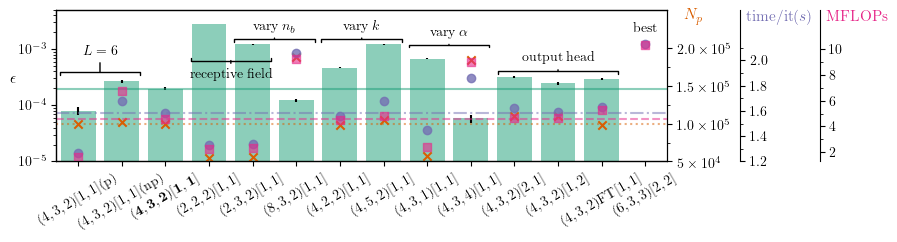

In [55]:
#Make summary plot
fsize=11
fig,ax1 = plt.subplots(figsize=(inches(20),inches(5)))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

for i, elem in enumerate(summary):
    ax1.bar(i,elem["relerr"][0],yerr=elem["relerr"][1],color=colors[0],alpha=0.5)
    ax4.scatter(i,elem["flops"]/1e6,marker='s',color=colors[3],alpha=0.6)
    ax3.scatter(i,elem["time/it"],marker='o',color=colors[2],alpha=0.8)
    ax2.scatter(i,elem["num_parameters"],marker='x',color=colors[1],alpha=1)

ax1.plot([-0.5,len(summary)-0.5],2*[summary[2]["relerr"][0]],'-',color=colors[0],alpha=0.5)
ax2.plot([-0.5,len(summary)-0.5],2*[summary[2]["num_parameters"]],':',color=colors[1],alpha=0.5)
ax3.plot([-0.5,len(summary)-0.5],2*[summary[2]["time/it"]],'-.',color=colors[2],alpha=0.5)
ax4.plot([-0.5,len(summary)-0.5],2*[summary[2]["flops"]/1e6],'--',color=colors[3],alpha=0.5)
    
ax3.spines["right"].set_position(("axes", +1.12))
ax3.spines["right"].set_visible(True)
ax4.spines["right"].set_position(("axes", +1.25))
ax4.spines["right"].set_visible(True)

ax1.set_xlim([-0.5,len(summary)-0.5])
ax1.set_ylim([1e-5,5e-3])
ax2.set_ylim([5e4,2.5e5])
ax3.set_ylim([1.25,2.4])
ax4.set_ylim([1.3,13])
ax1.set_xticks(np.arange(len(summary)))
ax1.set_xticklabels([elem["network"] for elem in summary],rotation=30)
ax1.set_yscale('log')
ax2.set_yticks(np.arange(5e4,2.1e5,5e4))
ax2.set_yticklabels([r'$5\times10^{4}$',r'$1.0\times10^{5}$',r'$1.5\times10^{5}$',r'$2.0\times10^{5}$'])
ax2.set_yticks(np.arange(7.5e4,2e5,5e4),minor=True)
ax3.set_yticks(np.arange(1.2,2.1,0.2))
ax3.set_yticks(np.arange(1.3,2.2,0.2),minor=True)
ax4.set_yticks(np.arange(2,11,2))
ax4.set_yticks(np.arange(3,11,2),minor=True)
ax1.set_ylabel(r'$\epsilon$',fontsize=fsize,rotation=0)
ax2.set_ylabel(r'$N_p$',fontsize=fsize,color=colors[1],labelpad=-20,rotation=0,loc='top')
ax3.set_ylabel(r'$\mathrm{time/it} (s)$',fontsize=fsize,color=colors[2],labelpad=32,rotation=0,loc='top')
ax4.set_ylabel(r'$\mathrm{MFLOPs}$',fontsize=fsize,color=colors[3],labelpad=32,rotation=0,loc='top')

#Annotations
width=2.9
ax1.annotate(r'$L=6$',
            xy=(0.5, 3.5e-4), xycoords='data',
            xytext=(0.5, 8e-4), textcoords='data',
            arrowprops=dict(arrowstyle=f"-[, widthB={width}"),
            ha='center')

ax1.annotate(r'$\mathrm{receptive\:field}$',
            xy=(3.5, 7e-4), xycoords='data',
            xytext=(3.5, 3e-4), textcoords='data',
            arrowprops=dict(arrowstyle=f"-[, widthB={width}"),
            ha='center')

ax1.annotate(r'$\mathrm{vary} \: n_b$',
            xy=(4.5, 1.5e-3), xycoords='data',
            xytext=(4.5, 2.2e-3), textcoords='data',
            arrowprops=dict(arrowstyle=f"-[, widthB={width}"),
            ha='center')
ax1.annotate(r'$\mathrm{vary} \: k$',
            xy=(6.5, 1.5e-3), xycoords='data',
            xytext=(6.5, 2.2e-3), textcoords='data',
            arrowprops=dict(arrowstyle=f"-[, widthB={width}"),
            ha='center')
ax1.annotate(r'$\mathrm{vary} \: \alpha$',
            xy=(8.5, 1.2e-3), xycoords='data',
            xytext=(8.5, 1.7e-3), textcoords='data',
            arrowprops=dict(arrowstyle=f"-[, widthB={width}"),
            ha='center')
ax1.annotate(r'$\mathrm{output\:head}$',
            xy=(11, 4e-4), xycoords='data',
            xytext=(11, 6e-4), textcoords='data',
            arrowprops=dict(arrowstyle=f"-[, widthB={1.5*width}"),
            ha='center')

ax1.annotate(r'$\mathrm{best}$',
            xy=(13, 4e-4), xycoords='data',
            xytext=(13, 2e-3), textcoords='data',
            ha='center')

plt.show()